x1 = -2.0
x2 = 1.000006
x3 = 1.000007
x4 = nan
x5 = nan
x6 = nan


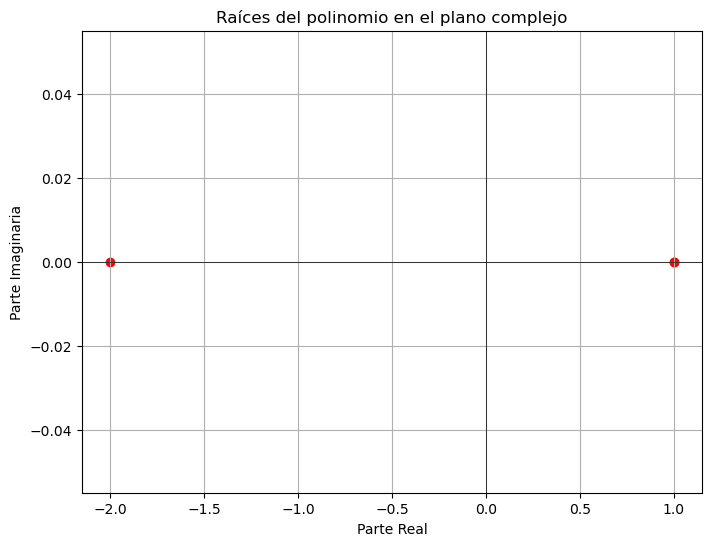

In [5]:
import numpy as np
from scipy.optimize import bisect, newton
import matplotlib.pyplot as plt

# Definimos la función del polinomio
def f(x):
    return x**5 - 6*x**4 + 2*x**3 + 20*x**2 - 27*x + 10

# Definimos la derivada del polinomio para el método de Newton
def f_prime(x):
    return 5*x**4 - 24*x**3 + 6*x**2 + 40*x - 27

# Identificamos intervalos donde la función cambia de signo para usar bisección
intervals = [(-2, -1), (-1, 0), (0, 1), (1, 2), (2, 3)]

roots = []

# Aplicamos bisección en los intervalos donde haya cambio de signo
for interval in intervals:
    a, b = interval
    if f(a) * f(b) < 0:  # Si hay un cambio de signo en el intervalo
        root = bisect(f, a, b)
        roots.append(root)

# Usamos el método de Newton para estimar raíces adicionales
initial_guesses = [-1.5, 0.5, 1.5, 2.5]  # Suposiciones iniciales cercanas a posibles raíces
for guess in initial_guesses:
    try:
        root = newton(f, guess, f_prime)
        roots.append(root)
    except RuntimeError:
        pass  # Ignorar si no converge

# Agrupamos las raíces y eliminamos duplicados
roots = np.unique(np.round(roots, decimals=6))  # Redondeamos para evitar duplicados numéricos

# Ordenamos las raíces en orden ascendente
roots_sorted = np.sort(roots)

# Asignamos las raíces a x1, x2, ..., x6 y completamos con NaN si hay menos de 6 raíces
x1, x2, x3, x4, x5, x6 = np.pad(roots_sorted, (0, 6 - len(roots_sorted)), 'constant', constant_values=np.nan)

# Imprimimos los valores de x1 a x6
print(f"x1 = {x1}")
print(f"x2 = {x2}")
print(f"x3 = {x3}")
print(f"x4 = {x4}")
print(f"x5 = {x5}")
print(f"x6 = {x6}")

# Graficamos las raíces
plt.figure(figsize=(8, 6))
plt.scatter(roots_sorted.real, roots_sorted.imag, color='red', marker='o')
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.title("Raíces del polinomio en el plano complejo")
plt.xlabel("Parte Real")
plt.ylabel("Parte Imaginaria")
plt.grid(True)
plt.show()

